# Decision Tree Classifier


In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df=pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
"""cp-chest pain
trestbps-resting blood pressure
chol-cholestral
fbs-fasting blood sugar
restecg-resting electrocardiography
exang-exercise induced agina
oldpeak-ST depression induced
slope- slope of peak exercise
ca-number of major vessels
thal-normal, fexied defect, reversible defect
target-(0-no heart disease, 1-has heart disease)
sex-(1-male, 2-female)
"""

'cp-chest pain\ntrestbps-resting blood pressure\nchol-cholestral\nfbs-fasting blood sugar\nrestecg-resting electrocardiography\nexang-exercise induced agina\noldpeak-ST depression induced\nslope- slope of peak exercise\nca-number of major vessels\nthal-normal, fexied defect, reversible defect\ntarget-(0-no heart disease, 1-has heart disease)\nsex-(1-male, 2-female)\n'

In [4]:
#creating depedent and indepedent variables
y=df.target.values #depedant(our goal)
x_data=df.drop(['target'], axis=1)  #indepedent

In [5]:
#normalizing data, min-max scaling to ensure that the features contribute equally hence improving performance of the algorithm
#normalisation scales data to a specific range between 1 and 0
#Subtracting the minimum value of the feature and dividing it by the difference between the maximum and minimum values
x= (x_data-np.min(x_data)) / (np.max(x_data)-np.min(x_data))

In [6]:
#splitting it into training and testing data
# 80% training, 20% testing
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [8]:
#feature scaling to improve performance. This is done only on the indepedent variables because the target has only 0 and 1
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [10]:
#decision trees: used for both classification and regression
#It is a tree structured classifier where internal nodes represent the features of a dataset, branches represent the decision rules and each leafnode represents the outcome
#pros:easy to understand, captures non linear relationships, can handle missing values and outliers
#cons:prone to overfitting, sensitive to small changes, may not work well with noisy data(data that is corrupted, inconsistent, irrelevant features, outliers, nulls etc)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0) #gini impurity is the measure of the impurity or randomness of the data at a node.the decision tree aims ar minimizing the ginin impurity 
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)
#determing accuracy 
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
print("Decision tree accuracy in %:" ,acc*100)


Decision tree accuracy in %: 84.39024390243902


In [11]:
#printing accuracy of training and testing set
print("Training set accuracy:{0:0.4}".format(dt.score(x_train, y_train)))
print("Testing set accuracy:{0:0.4}".format(dt.score(x_test, y_test)))


Training set accuracy:0.8476
Testing set accuracy:0.8439


[Text(0.5, 0.875, 'x[2] <= -0.437\ngini = 0.5\nsamples = 820\nvalue = [401, 419]'),
 Text(0.25, 0.625, 'x[11] <= -0.263\ngini = 0.372\nsamples = 397\nvalue = [299, 98]'),
 Text(0.125, 0.375, 'x[12] <= 0.294\ngini = 0.5\nsamples = 169\nvalue = [84, 85]'),
 Text(0.0625, 0.125, 'gini = 0.383\nsamples = 97\nvalue = [25, 72]'),
 Text(0.1875, 0.125, 'gini = 0.296\nsamples = 72\nvalue = [59, 13]'),
 Text(0.375, 0.375, 'x[9] <= -0.526\ngini = 0.108\nsamples = 228\nvalue = [215, 13]'),
 Text(0.3125, 0.125, 'gini = 0.285\nsamples = 58\nvalue = [48, 10]'),
 Text(0.4375, 0.125, 'gini = 0.035\nsamples = 170\nvalue = [167, 3]'),
 Text(0.75, 0.625, 'x[0] <= 0.207\ngini = 0.366\nsamples = 423\nvalue = [102, 321]'),
 Text(0.625, 0.375, 'x[9] <= 2.247\ngini = 0.215\nsamples = 253\nvalue = [31, 222]'),
 Text(0.5625, 0.125, 'gini = 0.176\nsamples = 246\nvalue = [24, 222]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.875, 0.375, 'x[1] <= -0.446\ngini = 0.486\nsamples = 170\nva

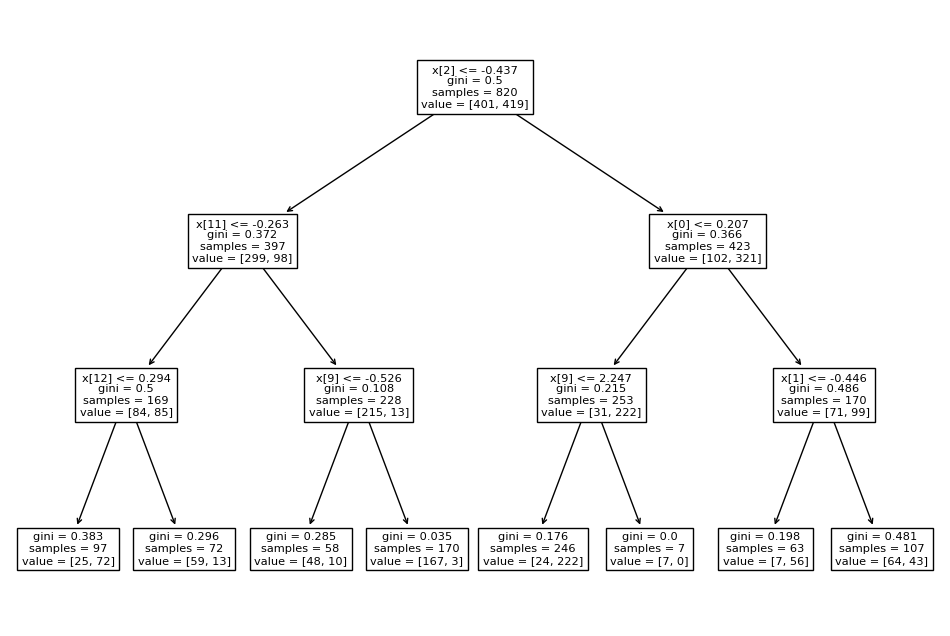

In [12]:
#visualising the decision tree
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt.fit(x_train, y_train))

In [13]:
#visualising the tree using graphiz into file 'heart_disease_new.dot'
class_names=df['target'].unique().astype(str)
import graphviz
tree.export_graphviz(dt,out_file="heart_disease_new.dot",feature_names=x.columns,class_names=class_names,label='all',filled=True,rounded=True)

In [17]:
#Confusion matrix for the model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm
#this shows that the model made 173 (81+92) correct predictions and 32 (17+15) wrong predictions.
#TP(True Positives)-81, TN(True Negatives)-92, FN(False Negatives)-17, FP(False Positives)-15

array([[81, 17],
       [15, 92]], dtype=int64)